In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 75

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/cactus-ds3/DBX",  # Adjust the path as needed
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)  

Found 2517 files belonging to 5 classes.


In [4]:
class_names = dataset.class_names
print(class_names)



['EarlyStage', 'Healthy', 'LateStage', 'NoCactus', 'Old_Dead']


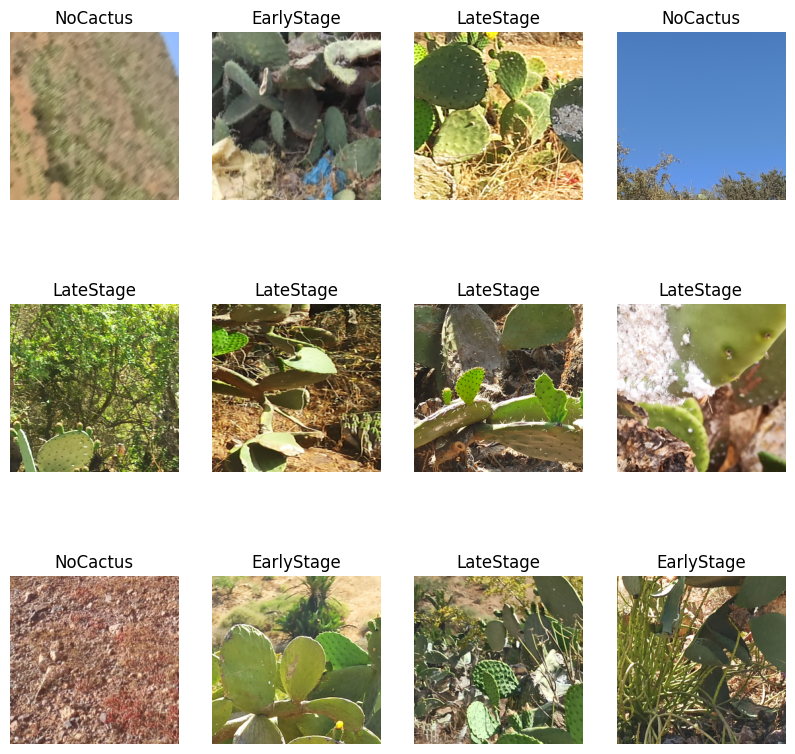

In [5]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [6]:
# 80% ==> training
# 20% ==> 10% validation, 10% testing
print(len(dataset))
train_size = 0.8
train_size * len(dataset)
train_ds = dataset.take(54)
len(train_ds)
val_size = 0.1
len(dataset) * val_size

79


7.9

In [7]:
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000):
    ds_size = len(ds)
    train_size = int(ds_size * train_split) 
    val_size = int(ds_size * val_split)
    test_size = int(ds_size * test_split)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds,test_ds

In [8]:
resize_and_rescale = tf.keras.Sequential([
            layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
            layers.Rescaling(1.0/255)
])
print("Resized and Rescaled.")

Resized and Rescaled.


In [9]:
augumented_data = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),                 
    layers.RandomHeight(0.1),                    
    layers.RandomWidth(0.1),                   
    layers.GaussianNoise(0.1)  
])
print("Augumented...")

Augumented...


In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10


model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    augumented_data,
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Using GlobalAveragePooling2D instead of Flatten to handle varying dimensions
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, None, None, 32) │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, None, None, 64) │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,074 (687.79 KB)

 Trainable params: 176,074 (687.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),metrics = ["accuracy"])
train_ds, val_ds,test_ds = get_dataset_partition(dataset)

In [12]:
   
   history = model.fit(
        train_ds,
        epochs = EPOCHS,
        batch_size = BATCH_SIZE,
        verbose = 1,
        validation_data = val_ds
)

Epoch 1/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.4123 - loss: 1.6947 - val_accuracy: 0.4688 - val_loss: 1.7055
Epoch 2/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.5237 - loss: 1.3196 - val_accuracy: 0.5179 - val_loss: 1.4856
Epoch 3/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.5247 - loss: 1.3219 - val_accuracy: 0.5938 - val_loss: 1.4122
Epoch 4/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.5438 - loss: 1.2403 - val_accuracy: 0.5446 - val_loss: 1.3993
Epoch 5/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.5173 - loss: 1.2515 - val_accuracy: 0.5540 - val_loss: 1.2491
Epoch 6/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.5228 - loss: 1.2418 - val_accuracy: 0.5714 - val_loss: 1.1766
Epoch 7/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.5302 - loss: 1.2332 - val_accuracy: 0.5045 - val_loss: 1.2685
Epoch 8/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.5331 - loss: 1.2318 - val_accuracy: 0.4883 - v

In [13]:
scores = model.evaluate(test_ds)
scores

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 616ms/step - accuracy: 0.4498 - loss: 1.3797


[1.3098856210708618, 0.4722222089767456]

In [14]:
history.history.keys()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]
print(val_loss, "\n")

[1.7055377960205078, 1.485629916191101, 1.4122377634048462, 1.3993399143218994, 1.249051570892334, 1.176619529724121, 1.2684895992279053, 1.2840126752853394, 1.2598711252212524, 1.145369291305542, 1.1947726011276245, 1.2007181644439697, 1.1844760179519653, 1.2652612924575806, 1.2041388750076294, 1.2053004503250122, 1.3086131811141968, 1.2734897136688232, 1.2677141427993774, 1.1848074197769165, 1.2390220165252686, 1.2441965341567993, 1.1963757276535034, 1.2386738061904907, 1.2665740251541138, 1.1998217105865479, 1.2514997720718384, 1.2586413621902466, 1.1989904642105103, 1.1664162874221802, 1.2368770837783813, 1.1341761350631714, 1.1518796682357788, 1.3012139797210693, 1.217626690864563, 1.254157304763794, 1.224795937538147, 1.2561838626861572, 1.1809660196304321, 1.247557282447815, 1.292763590812683, 1.2416068315505981, 1.2114063501358032, 1.1591824293136597, 1.2684894800186157, 1.1995160579681396, 1.2645312547683716, 1.1692546606063843, 1.2979507446289062, 1.2586700916290283, 1.232846

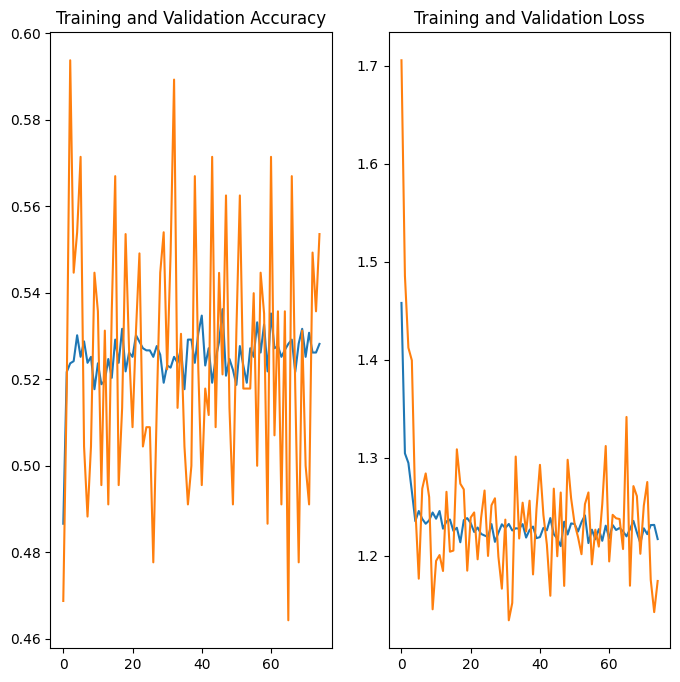

In [15]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
# plt.legend(loc="Lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss,label="Validation Loss")  # Corrected: Use val_loss for validation loss
# plt.legend(loc="Lower right")
plt.title("Training and Validation Loss")

plt.show()

First image to predict


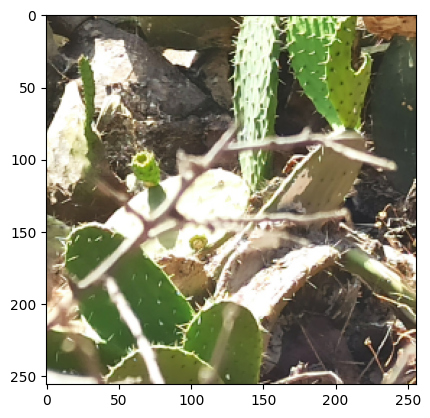

Actual label:  EarlyStage
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
[[1.15099713e-01 4.44588922e-02 5.41252255e-01 2.62166828e-01
  3.69715318e-02 7.63195112e-06 4.70031273e-06 1.34033844e-05
  1.58109942e-05 9.15832334e-06]
 [1.15537055e-01 4.48236987e-02 5.40179133e-01 2.62160599e-01
  3.72458845e-02 8.10281381e-06 5.00422948e-06 1.41446235e-05
  1.66883237e-05 9.67618053e-06]
 [1.15420185e-01 4.47977036e-02 5.40165365e-01 2.62222767e-01
  3.73406522e-02 8.02129489e-06 4.96868415e-06 1.40761986e-05
  1.65668298e-05 9.64553965e-06]
 [1.15601331e-01 4.48895916e-02 5.39996505e-01 2.62156814e-01
  3.73015143e-02 8.17826822e-06 5.05455000e-06 1.42669633e-05
  1.68159313e-05 9.76042156e-06]
 [1.15379572e-01 4.46911529e-02 5.40550947e-01 2.62175024e-01
  3.71506363e-02 7.94531388e-06 4.90015054e-06 1.38950782e-05
  1.63872737e-05 9.49553032e-06]
 [1.15608454e-01 4.48871404e-02 5.39986789e-01 2.62163818e-01
  3.72995175e-02 8.18968783e-06 5.06003471e-06 1.42843373e-05
  1.68483111e-05 9.7733236

In [16]:
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    plt.show() 

    print("Actual label: ", class_names[first_label])
    batch_prediction = model.predict(image_batch)  # Use image_batch instead of images_batch
    print(batch_prediction)
    predicted_index = np.argmax(batch_prediction[0])  # Correct indexing
    predicted_label = class_names[predicted_index]
    print("Predicted Label: ", predicted_label)
    
    


In [17]:
def predict(model, img):
    if not isinstance(img, np.ndarray):
        img_array = tf.keras.img_to_array(img)
    else:
        img_array = img
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence


In [18]:
#Saving the model in .keras format
model.save("model_cactus.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
Accuracy: 0.5208
Precision: 0.2713
Recall: 0.5208
F1 Score: 0.3567


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


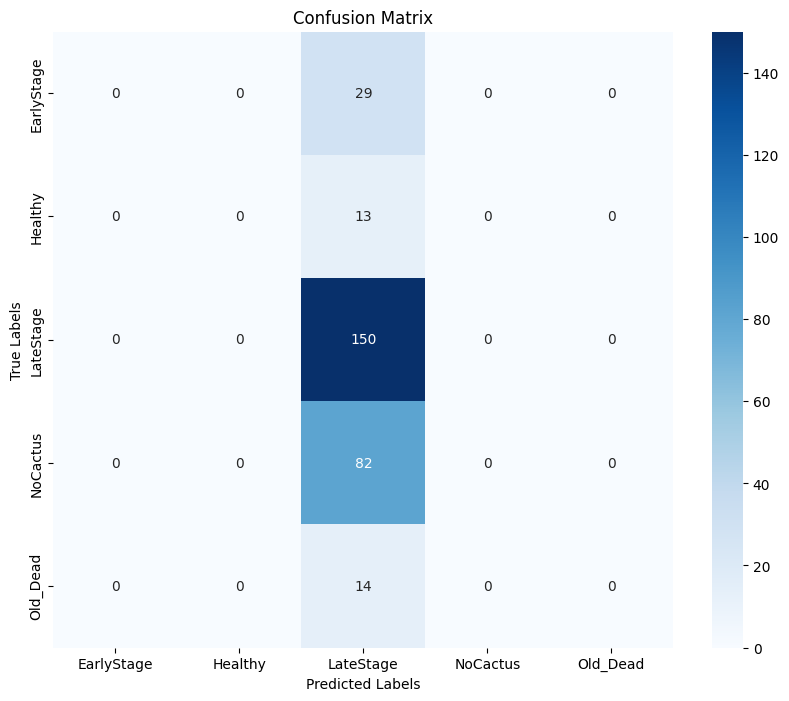

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on test set
true_labels = []
predicted_labels = []

for image_batch, label_batch in test_ds:
    predictions = model.predict(image_batch)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(label_batch.numpy())

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average="weighted")
recall = recall_score(true_labels, predicted_labels, average="weighted")
f1 = f1_score(true_labels, predicted_labels, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


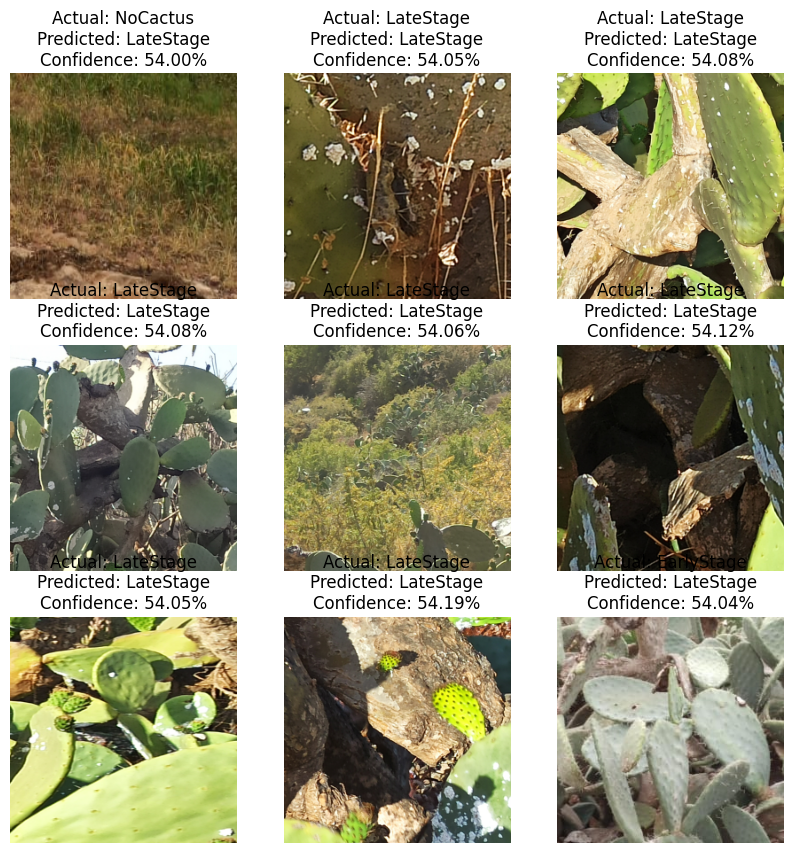

In [20]:
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
        # Turning off the axis labels
        plt.axis("off")
    # Showing plot
    plt.show()
